In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import mean_squared_error

# Data Loading

In [2]:
train_df=pd.read_csv("train.csv")
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


### Understanding the data

In [3]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
train_df.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [5]:
col_names =train_df.columns

### Checking for categorical features

In [6]:
categorical_variables = []

for col in col_names:
    if train_df[col].dtype == 'object':
        categorical_variables.append(col)
        

In [7]:
categorical_variables

['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']

### Droping Id column

In [8]:
train_df.drop('Id',axis=1,inplace=True)

### Converting data type of dependency, edjefe and edjefa columns into float 

### dependency feature contains combination of int, float and object data type

In [9]:
train_df['dependency']

0        no
1         8
2         8
3       yes
4       yes
       ... 
9552    .25
9553    .25
9554    .25
9555    .25
9556    .25
Name: dependency, Length: 9557, dtype: object

### edjefe feature contains combination of int, float and object data type

In [10]:
train_df['edjefe']

0       10
1       12
2       no
3       11
4       11
        ..
9552     9
9553     9
9554     9
9555     9
9556     9
Name: edjefe, Length: 9557, dtype: object

### edjefa feature contains combination of int, float and object data type

In [11]:
train_df['edjefa']

0       no
1       no
2       11
3       no
4       no
        ..
9552    no
9553    no
9554    no
9555    no
9556    no
Name: edjefa, Length: 9557, dtype: object

In [12]:
mapping={'yes':1,'no':0}
for train_df in [train_df]:
    train_df['dependency'] =train_df['dependency'].replace(mapping).astype(np.float64)
    train_df['edjefe'] =train_df['edjefe'].replace(mapping).astype(np.float64)
    train_df['edjefa'] =train_df['edjefa'].replace(mapping).astype(np.float64)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 142 entries, v2a1 to Target
dtypes: float64(11), int64(130), object(1)
memory usage: 10.4+ MB


### Renaming dependency, edjefe and edjefa columns

In [14]:
train_df.rename(columns = {'dependency':'_dependency','edjefe':'_edjefe','edjefa':'_edjefa'}, inplace = True)

In [15]:
train_df.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


### Removing Columns

In [16]:
sq_cols = train_df.columns[train_df.columns.str.startswith('SQ')] 
print(sq_cols)
train_df.drop(['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned','agesq'],axis=1,inplace=True)

Index(['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


### Visual representation of each column for checking Bias  

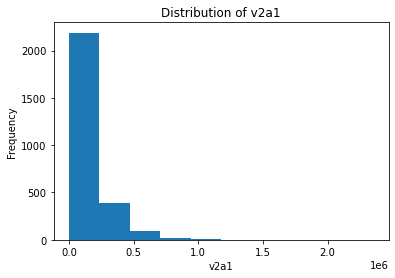

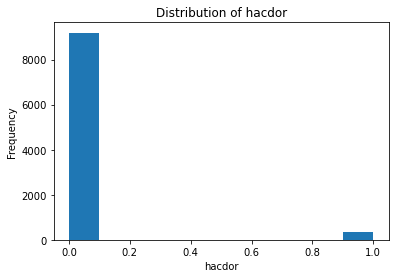

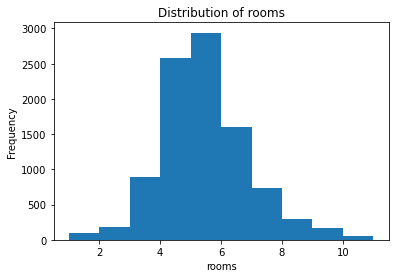

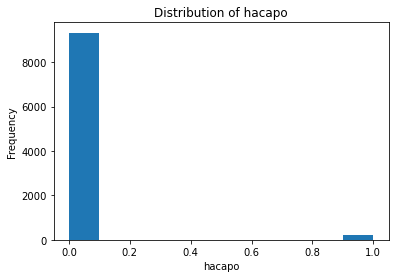

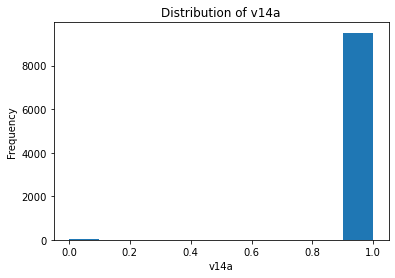

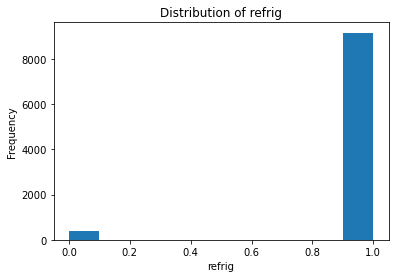

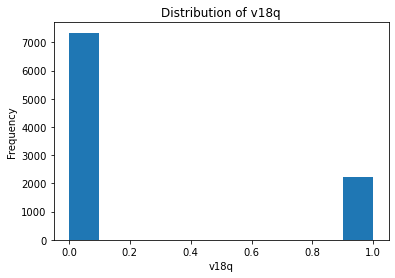

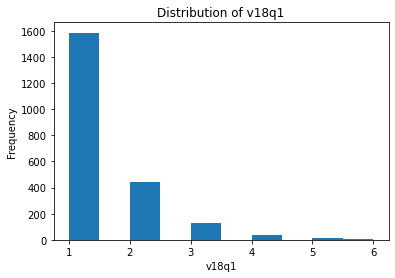

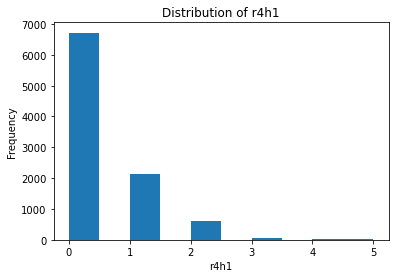

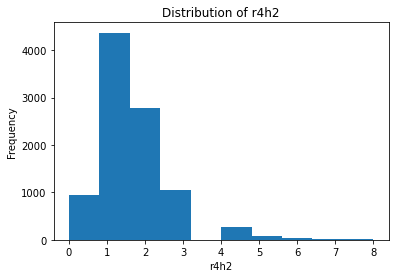

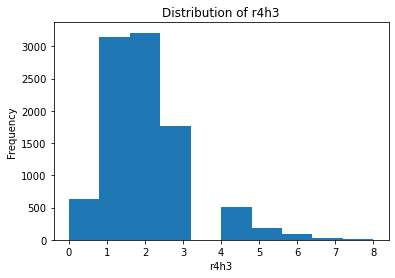

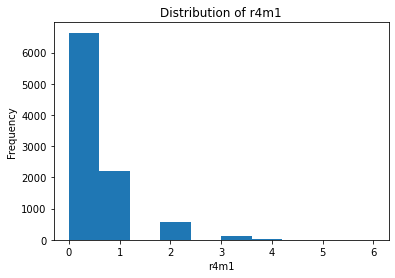

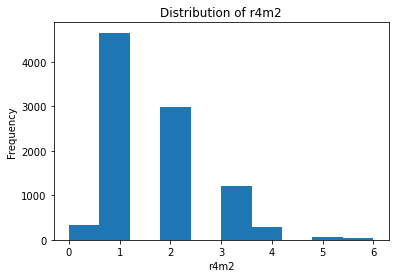

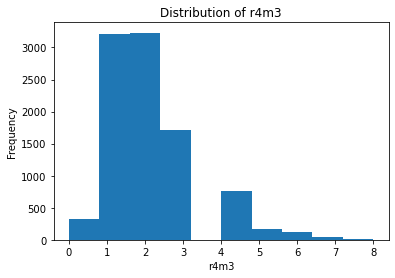

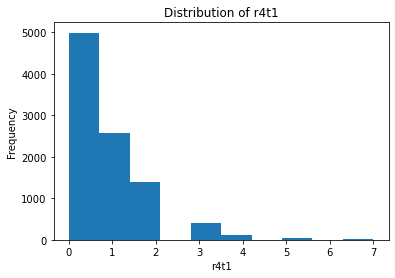

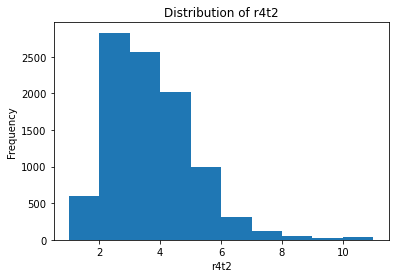

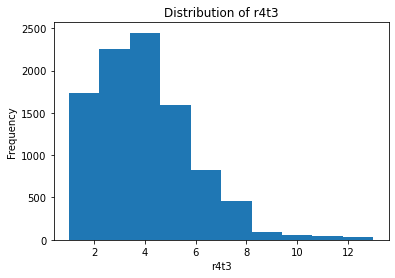

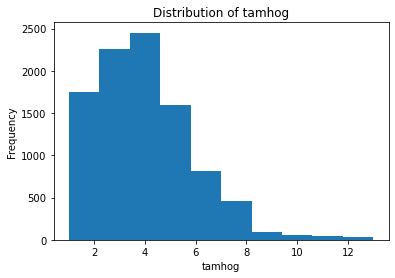

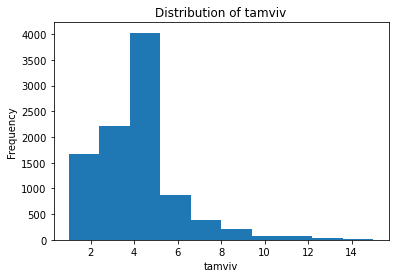

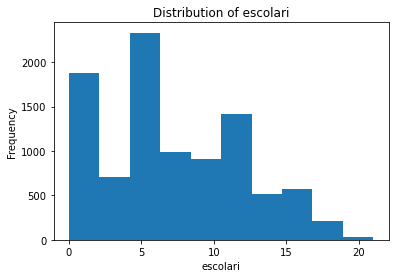

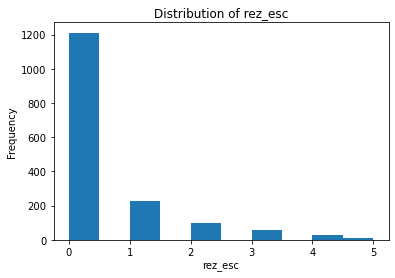

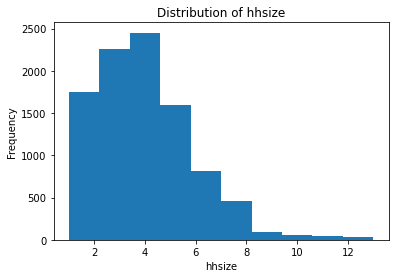

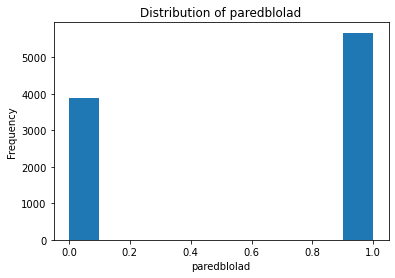

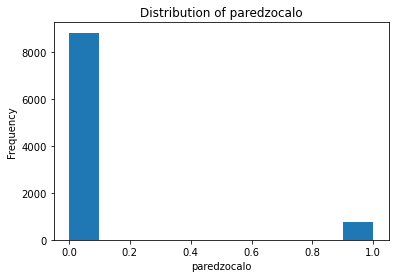

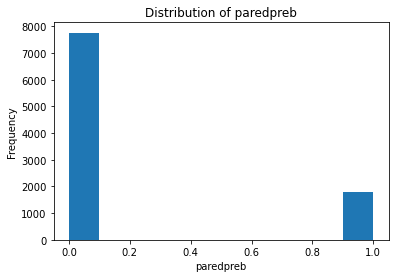

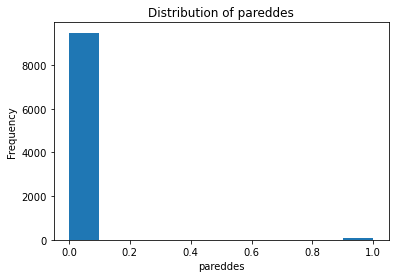

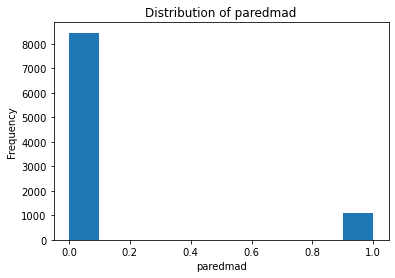

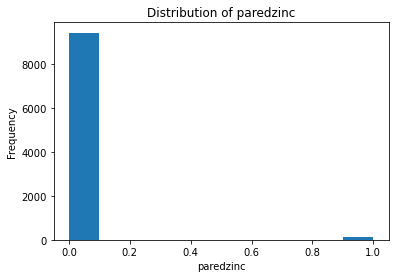

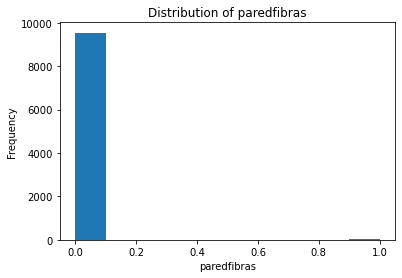

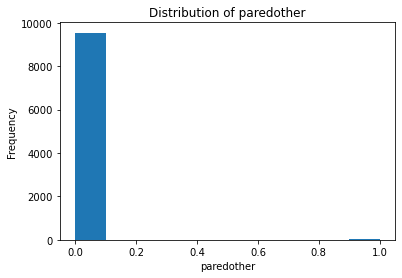

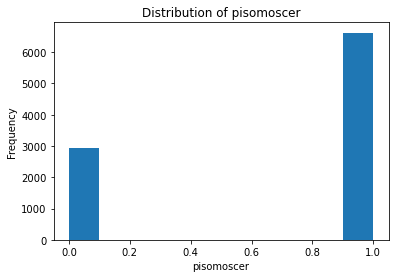

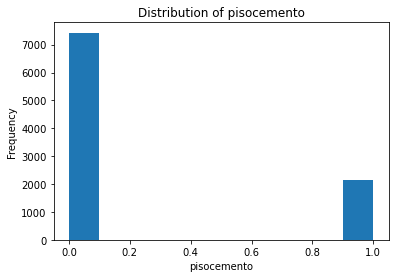

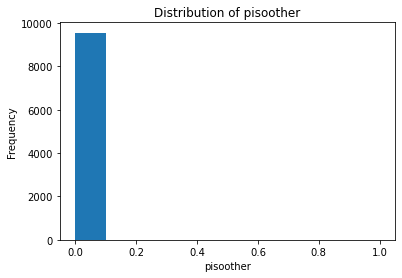

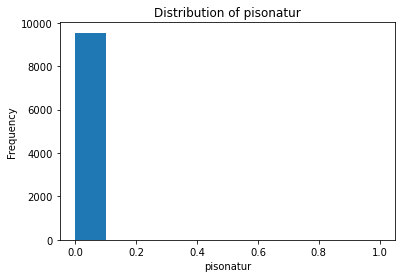

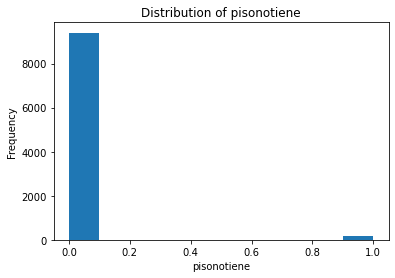

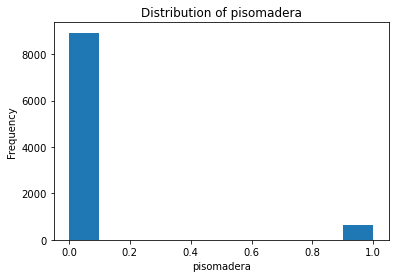

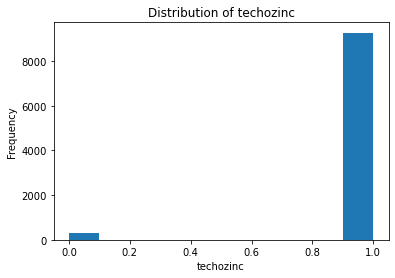

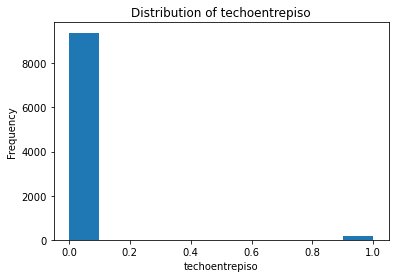

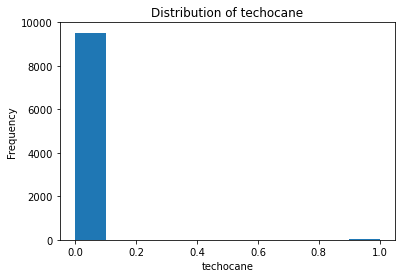

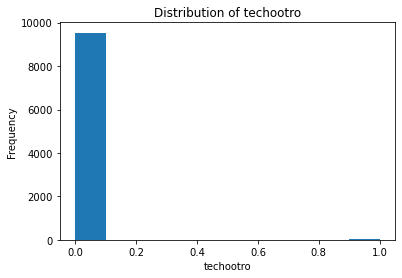

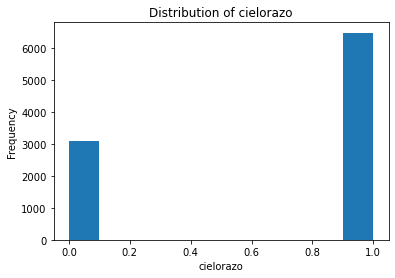

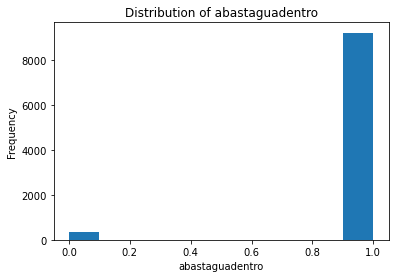

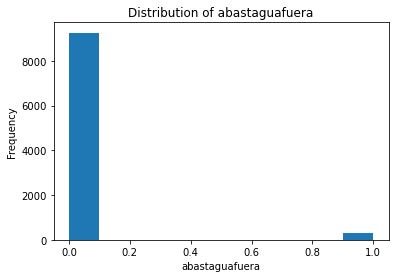

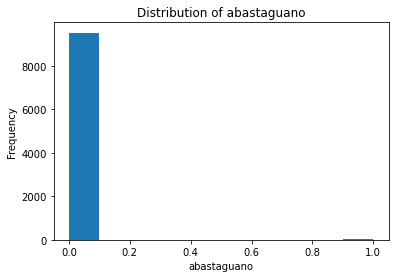

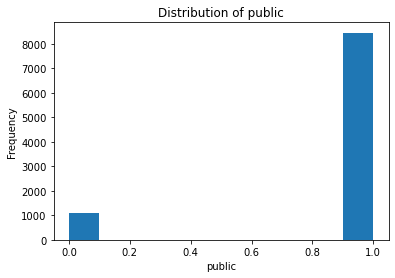

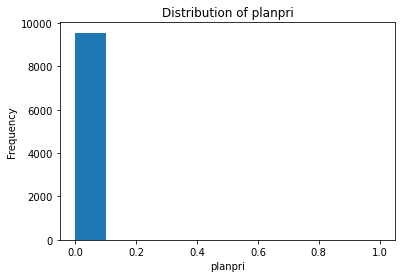

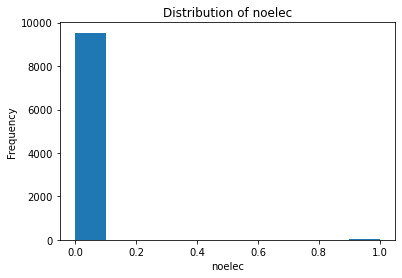

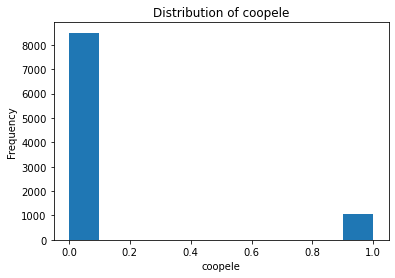

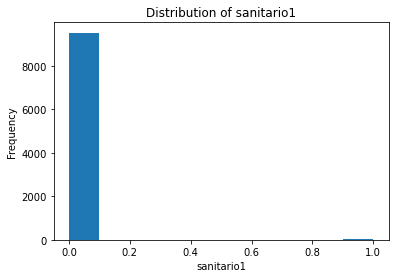

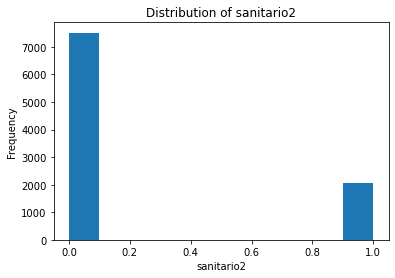

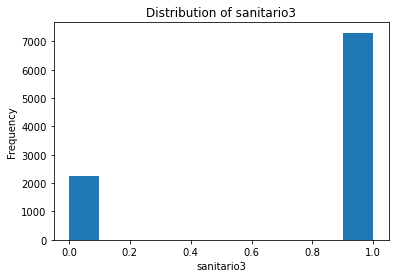

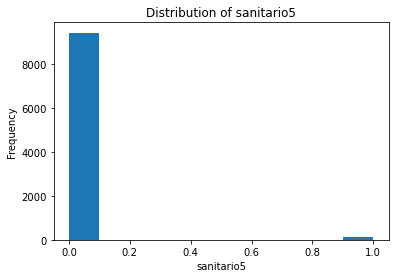

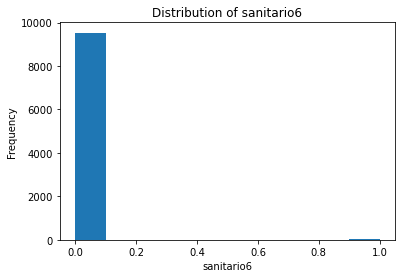

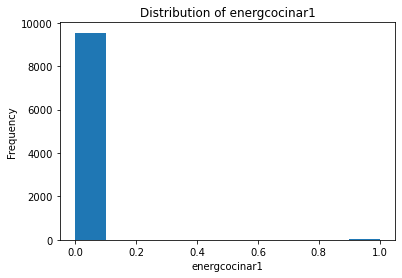

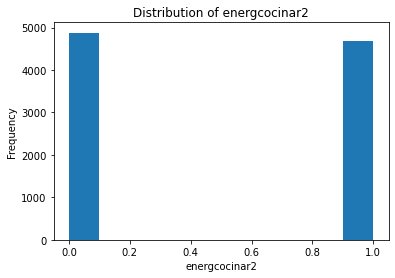

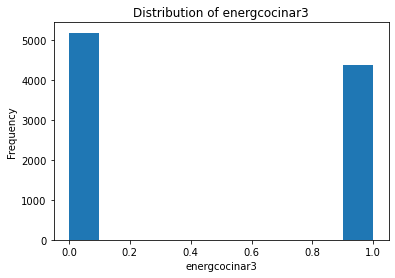

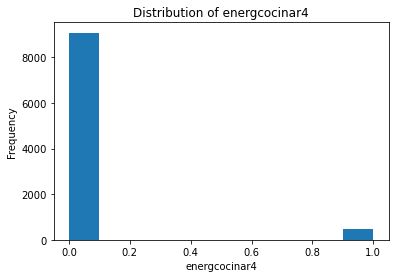

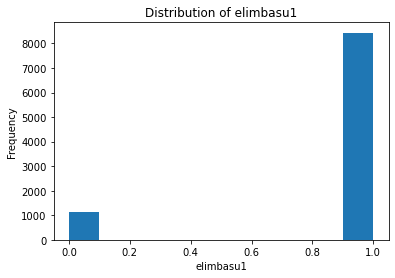

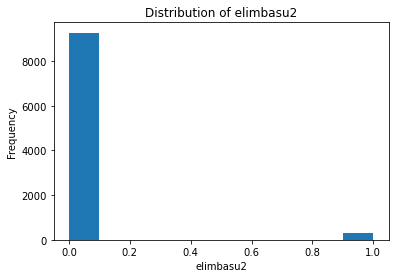

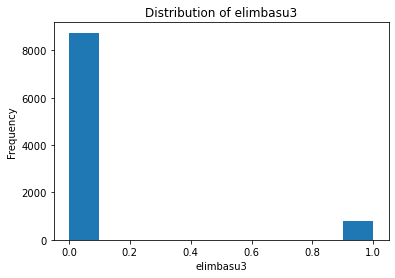

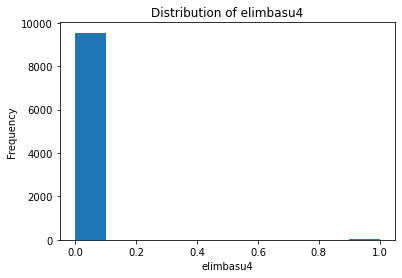

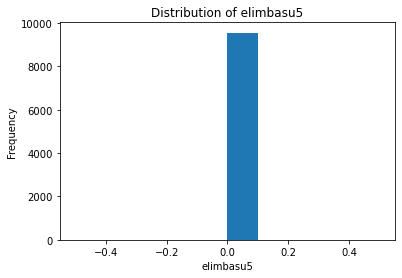

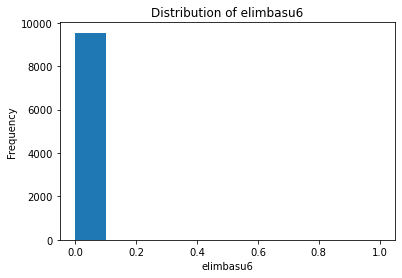

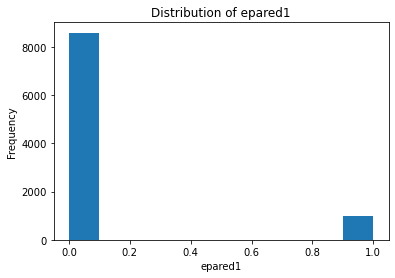

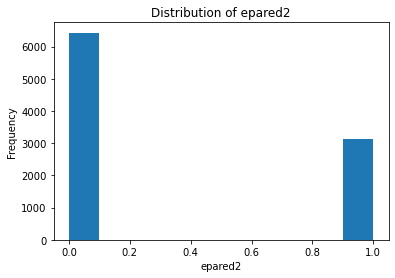

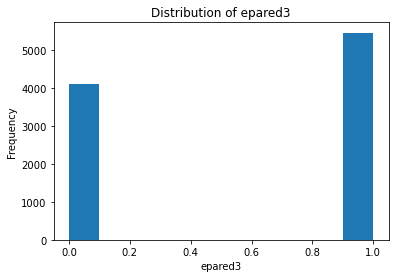

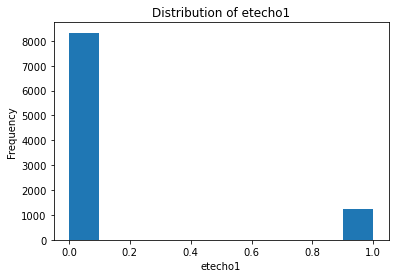

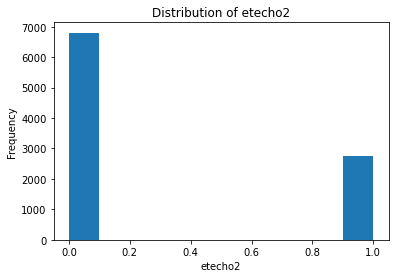

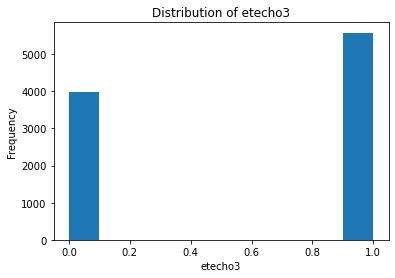

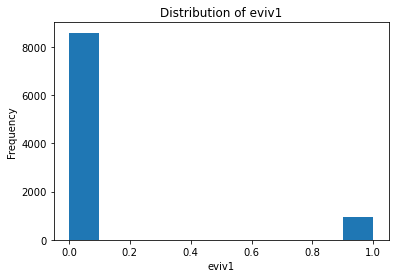

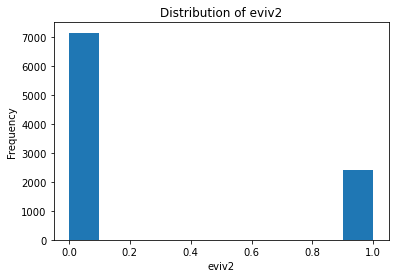

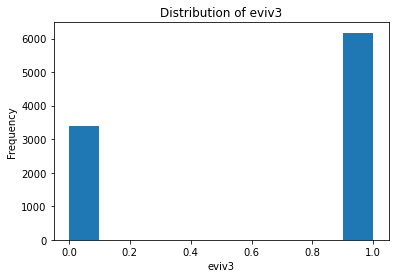

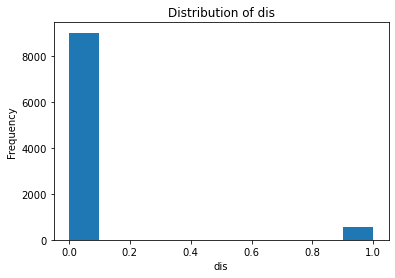

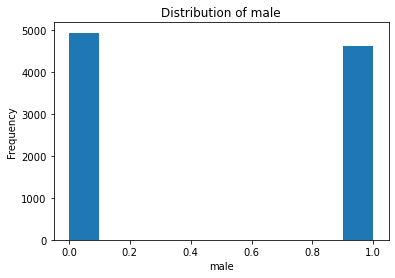

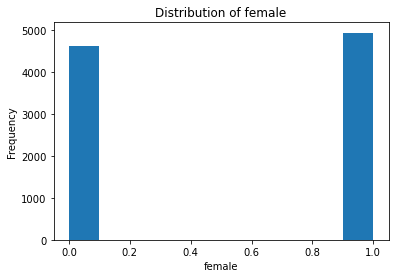

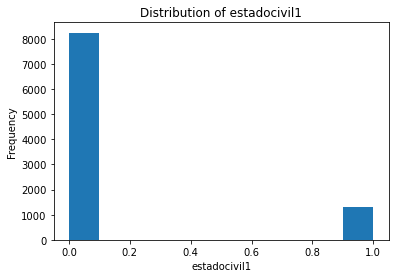

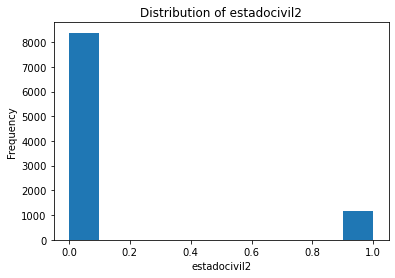

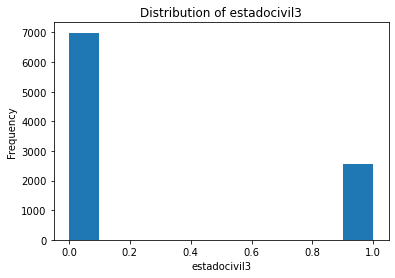

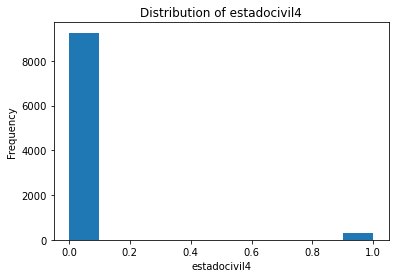

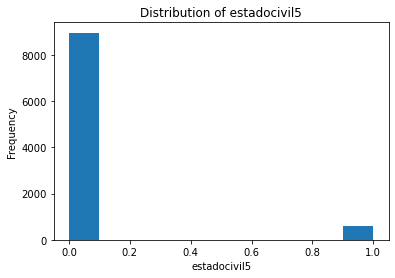

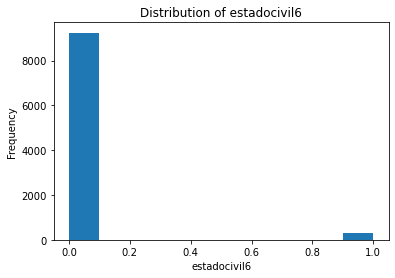

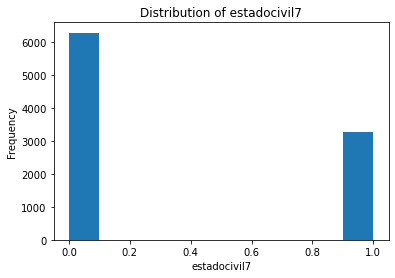

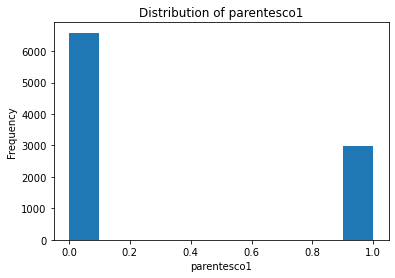

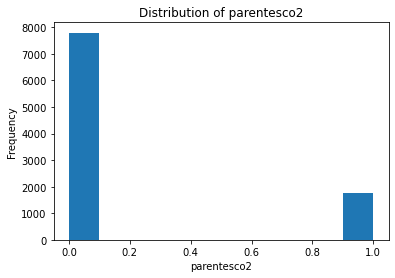

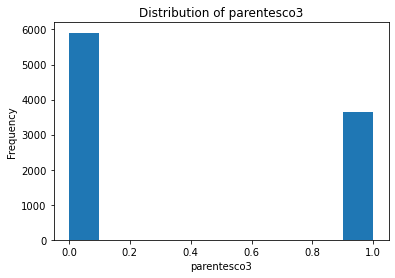

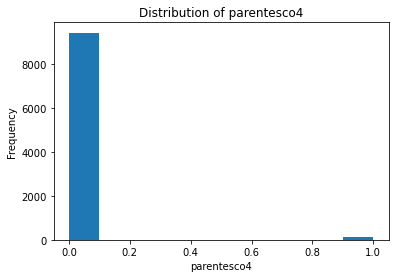

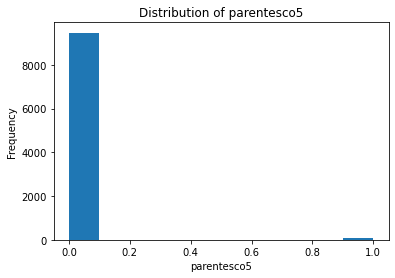

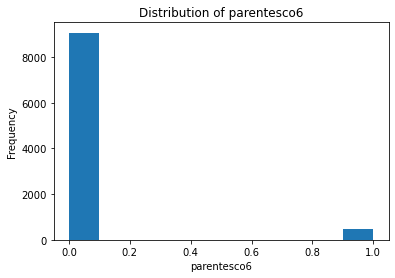

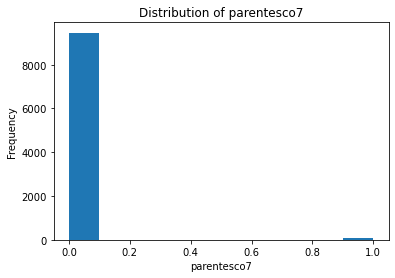

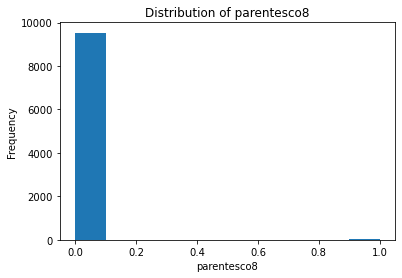

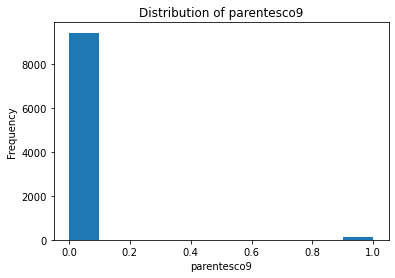

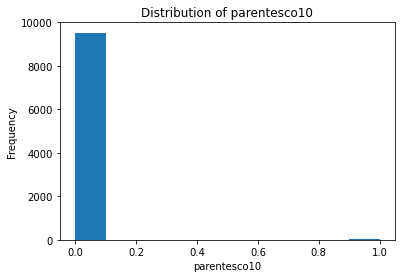

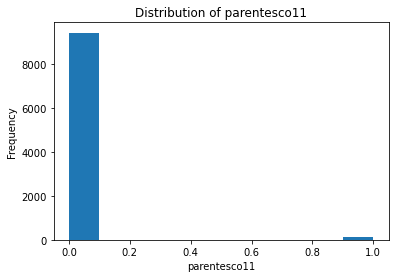

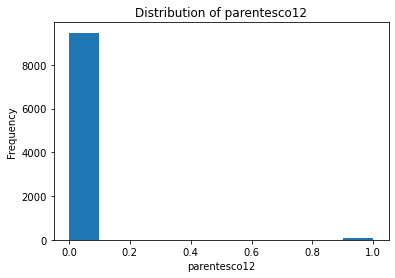

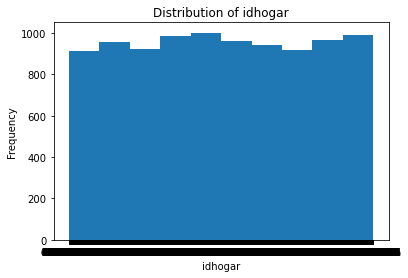

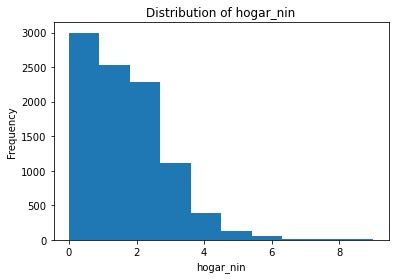

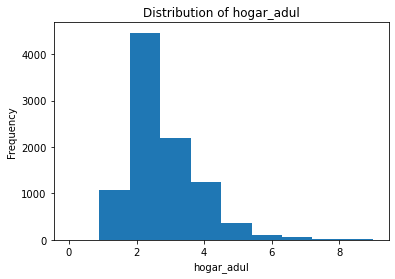

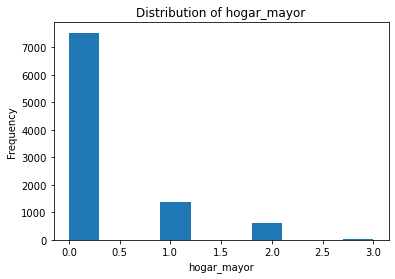

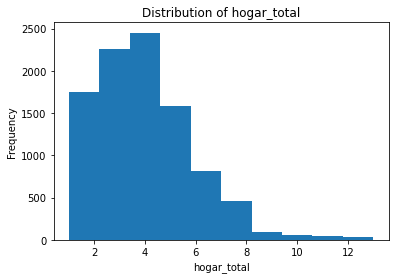

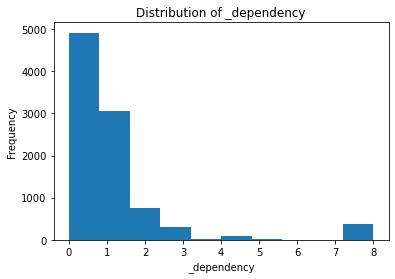

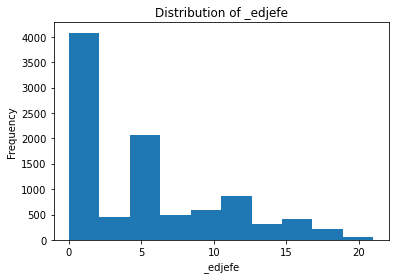

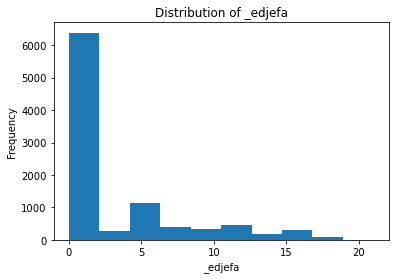

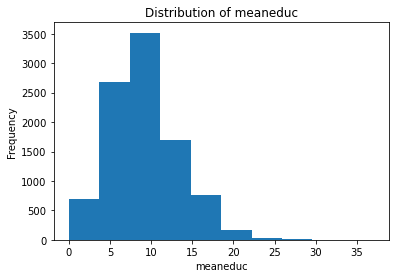

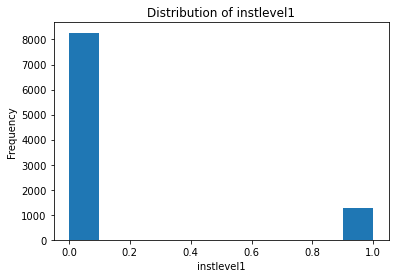

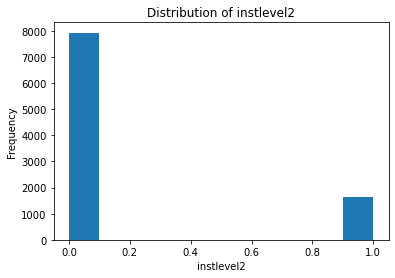

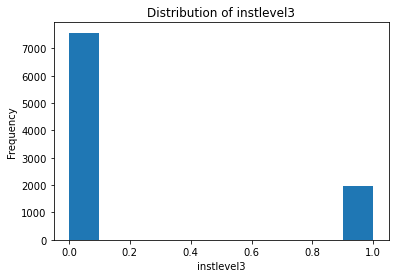

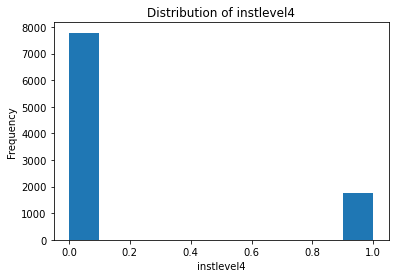

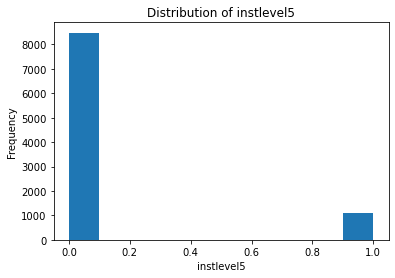

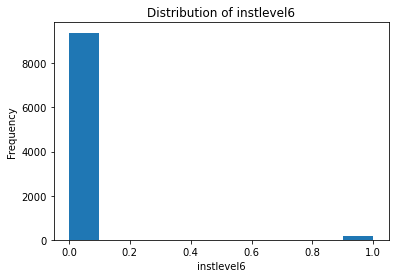

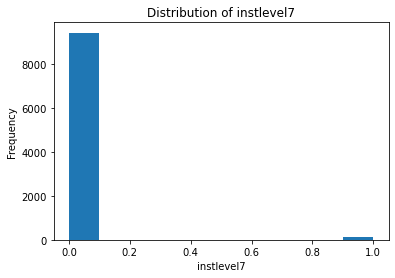

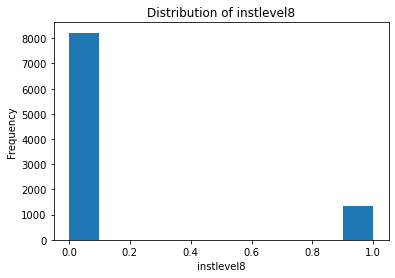

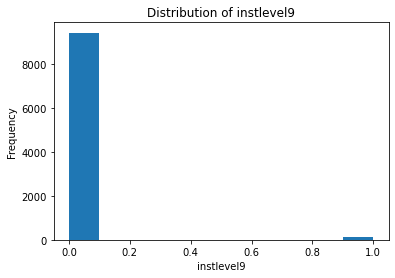

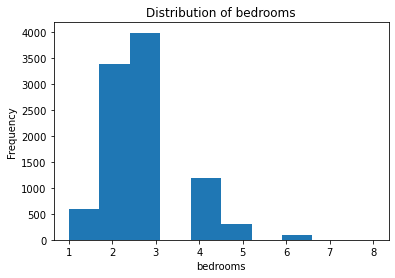

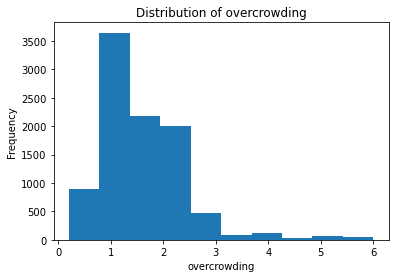

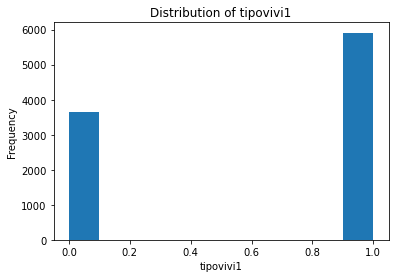

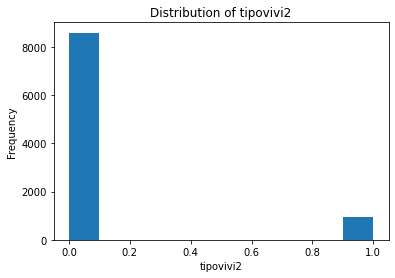

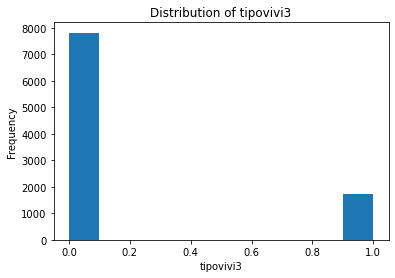

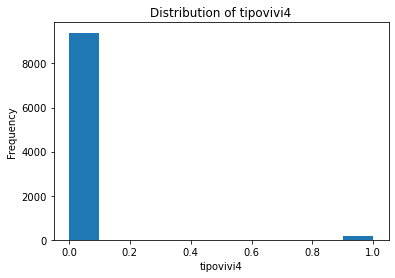

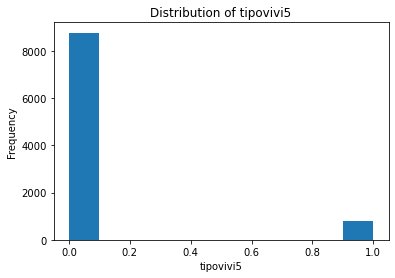

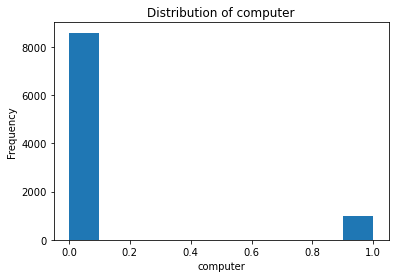

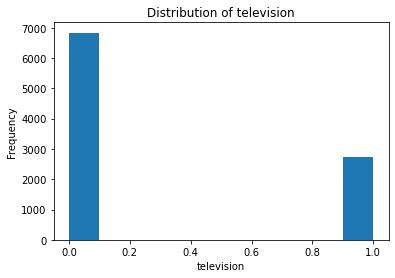

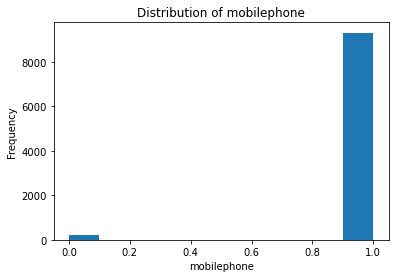

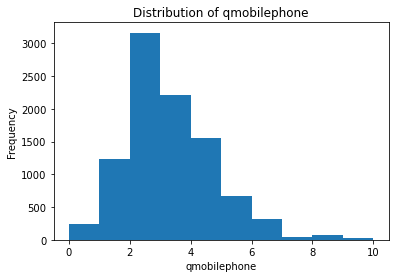

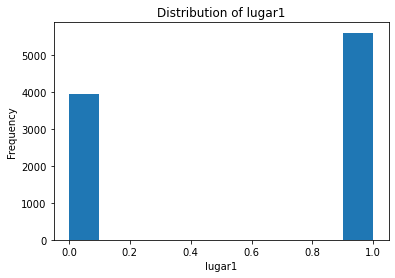

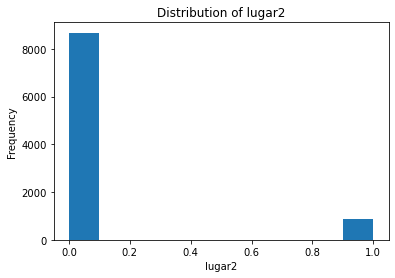

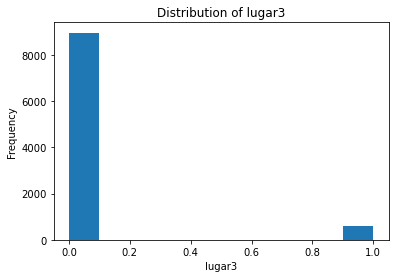

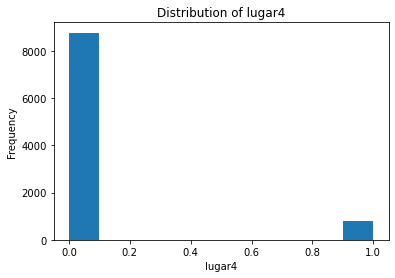

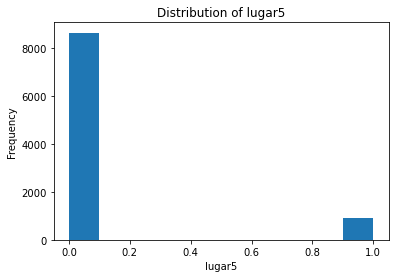

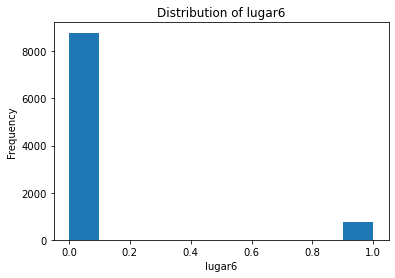

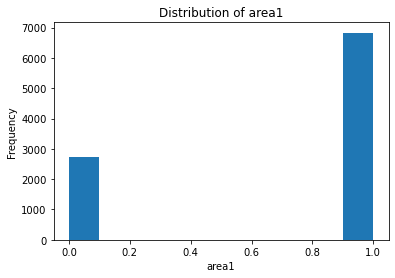

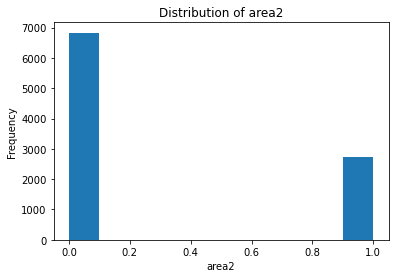

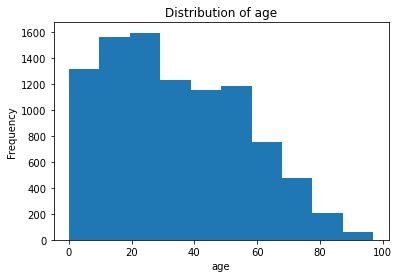

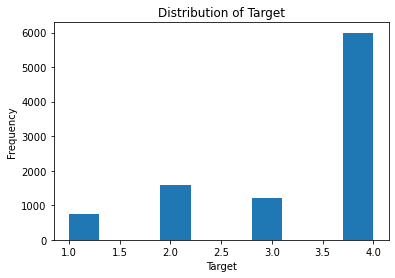

In [17]:
for column in train_df.columns:
    plt.hist(train_df[column])
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title("Distribution of " + column)
    plt.show()

### Feature Imputation

In [18]:
# get columns with float64 and int64 data types 
float_cols = train_df.select_dtypes('float64').columns 
int_cols = train_df.select_dtypes('int64').columns 
# combine the two column types 
combined_cols = list(float_cols) + list(int_cols) 
# create new dataframe with combined columns 
df_combined = train_df[combined_cols] 
# print the new dataframe 
print('Dataframe with combined float64 and int64 columns:') 
print(int_cols)


Dataframe with combined float64 and int64 columns:
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1',
       'area2', 'age', 'Target'],
      dtype='object', length=124)


In [19]:
result = []
for col in df_combined:
    col_mean = np.mean(train_df[col])
    col_mode = train_df[col].mode()[0]
    col_median = np.median(train_df[col])

    
    col_mse_mean = np.mean((train_df[col] - col_mean) ** 2)
    col_mse_mode = np.mean((train_df[col] - col_mode) ** 2)
    col_mse_median = np.mean((train_df[col] - col_median) ** 2)
    
    # Store the results in a dictionary and append it to the result list
    col_result = {'Column': col, 'Mean': col_mean, 'Mode': col_mode, 'Median': col_median, 
                  'MSE Mean': col_mse_mean, 'MSE Mode': col_mse_mode, 'MSE Median': col_mse_median}
    result.append(col_result)

# Convert the result list to a dataframe and display it
result_df = pd.DataFrame(result)
# print(result_df)

# print(pd.crosstab(index=result_df['Column'], columns='Mean', values=result_df['Mean'], aggfunc=np.mean))
# print(pd.crosstab(index=result_df['Column'], columns='Mode', values=result_df['Mode'], aggfunc=np.mean))
# print(pd.crosstab(index=result_df['Column'], columns='Median', values=result_df['Median'], aggfunc=np.mean))
# print(pd.crosstab(index=result_df['Column'], columns='MSE Mean', values=result_df['MSE Mean'], aggfunc=np.mean))
# print(pd.crosstab(index=result_df['Column'], columns='MSE Mode', values=result_df['MSE Mode'], aggfunc=np.mean))
# print(pd.crosstab(index=result_df['Column'], columns='MSE Median', values=result_df['MSE Median'], aggfunc=np.mean))

result_df_sorted = result_df.sort_values(by=['MSE Mean', 'MSE Mode', 'MSE Median'])
result_df['Min MSE column'] = result_df[['MSE Mean', 'MSE Mode', 'MSE Median']].idxmin(axis=1)
result_df['Min MSE'] = result_df[['MSE Mean', 'MSE Mode', 'MSE Median']].min(axis=1)

print(result_df)

          Column           Mean      Mode     Median      MSE Mean  \
0           v2a1  165231.606971  150000.0        NaN  2.262896e+10   
1          v18q1       1.404063       1.0        NaN  5.821054e-01   
2        rez_esc       0.459791       0.0        NaN  8.954060e-01   
3    _dependency       1.149550       1.0   0.666667  2.578943e+00   
4        _edjefe       5.096788       0.0   6.000000  2.752302e+01   
..           ...            ...       ...        ...           ...   
127       lugar6       0.080674       0.0   0.000000  7.416558e-02   
128        area1       0.714555       1.0   1.000000  2.039662e-01   
129        area2       0.285445       0.0   0.000000  2.039662e-01   
130          age      34.303547      23.0  31.000000  4.670410e+02   
131       Target       3.302292       4.0   4.000000  1.019115e+00   

         MSE Mode  MSE Median Min MSE column       Min MSE  
0    2.286096e+10         NaN       MSE Mean  2.262896e+10  
1    7.453725e-01         NaN       M

### Selected features imputation reverification

In [20]:
features = ['hacdor', 'rooms', 'v18q', 'r4h1', 'r4m1', 'r4m3', 'r4t1', 'escolari', 'paredblolad', 'pisomoscer', 'pisocemento', 'cielorazo', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'hogar_nin', 'meaneduc', 'instlevel8', 'overcrowding', 'computer', 'qmobilephone', 'lugar1', 'v2a1', 'age', 'tamviv', 'tamhog', 'hhsize', 'hogar_total', 'r4t3', 'r4t2']

result = []

# Loop through each feature in the list
for feature in features:
    # Calculate the mean, mode, and median for the feature
    col_mean = np.mean(df_combined[feature])
    col_mode = df_combined[feature].mode()[0]
    col_median = np.median(df_combined[feature])
    
    # Calculate the mean square error for the mean, mode, and median
    col_mse_mean = np.mean((df_combined[feature] - col_mean) ** 2)
    col_mse_mode = np.mean((df_combined[feature] - col_mode) ** 2)
    col_mse_median = np.mean((df_combined[feature] - col_median) ** 2)
    
    # Fill in missing values with ffill and calculate the mean square error
    ffill_values = df_combined[feature].fillna(method='ffill')
    col_mse_ffill = np.mean((df_combined[feature] - ffill_values) ** 2)
    
    # Fill in missing values with bfill and calculate the mean square error
    bfill_values = df_combined[feature].fillna(method='bfill')
    col_mse_bfill = np.mean((df_combined[feature] - bfill_values) ** 2)
    
    # Store the results in a dictionary and append it to the result list
    feature_result = {'Feature': feature, 'Mean': col_mean, 'Mode': col_mode, 'Median': col_median, 
                      'MSE Mean': col_mse_mean, 'MSE Mode': col_mse_mode, 'MSE Median': col_mse_median,
                      'MSE ffill': col_mse_ffill, 'MSE bfill': col_mse_bfill}
    result.append(feature_result)

# Convert the result list to a dataframe and display the lowest MSE for each feature
result_df = pd.DataFrame(result)

# Sort the dataframe by the MSE for each feature
result_df_sorted = result_df.sort_values(by=['MSE Mean', 'MSE Mode', 'MSE Median'])
result_df['Min MSE column'] = result_df[['MSE Mean', 'MSE Mode', 'MSE Median']].idxmin(axis=1)
result_df['Min MSE'] = result_df[['MSE Mean', 'MSE Mode', 'MSE Median']].min(axis=1)

print(result_df)

         Feature           Mean      Mode  Median      MSE Mean      MSE Mode  \
0         hacdor       0.038087       0.0     0.0  3.663663e-02  3.808727e-02   
1          rooms       4.955530       5.0     5.0  2.155917e+00  2.157895e+00   
2           v18q       0.231767       0.0     0.0  1.780512e-01  2.317673e-01   
3           r4h1       0.385895       0.0     0.0  4.634110e-01  6.123260e-01   
4           r4m1       0.399184       0.0     0.0  4.794510e-01  6.387988e-01   
5           r4m3       2.060898       2.0     2.0  1.454699e+00  1.458407e+00   
6           r4t1       0.785079       0.0     0.0  1.097264e+00  1.713613e+00   
7       escolari       7.200272       6.0     6.0  2.237885e+01  2.381950e+01   
8    paredblolad       0.594015       1.0     1.0  2.411612e-01  4.059851e-01   
9     pisomoscer       0.692791       1.0     1.0  2.128318e-01  3.072094e-01   
10   pisocemento       0.222873       0.0     0.0  1.732008e-01  2.228733e-01   
11     cielorazo       0.677

### Replacing Null values with Mean

In [21]:
train_df.fillna(train_df.mean(), inplace=True)

C:\Users\swapnil_tonape\AppData\Local\Temp\ipykernel_12568\2187500992.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.fillna(train_df.mean(), inplace=True)


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 133 entries, v2a1 to Target
dtypes: float64(8), int64(124), object(1)
memory usage: 9.7+ MB


### Checking whether all members of the house have the same poverty level

In [23]:
same_target_value = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
diff_target_value = same_target_value[same_target_value != True]
print('{} members of the house have the different poverty level.'.format(len(diff_target_value)))

85 members of the house have the different poverty level.


In [24]:
train_df[train_df['idhogar'] == diff_target_value.index[84]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
8793,f94589d38,0,2
8794,f94589d38,0,2
8795,f94589d38,1,1


In [25]:
family_head = train_df.groupby('idhogar')['parentesco1'].sum()

In [26]:
family_head

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

### Checking if there is a house without a family head

In [27]:
families_without_head = train_df.loc[train_df['idhogar'].isin(family_head[family_head == 0].index), :]
print("{} families don't have any family head.".format(families_without_head['idhogar'].nunique()))

15 families don't have any family head.


### Checking if there is a family without head have different poverty level

In [28]:
families_without_head_same = families_without_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} families without head have different poverty level.'.format(sum(families_without_head_same == False)))

0 families without head have different poverty level.


### Seting same poverty level of the members and the head of the house within a family

In [29]:
for families in diff_target_value.index:
    head_target = int(train_df[(train_df['idhogar'] == families) & (train_df['parentesco1'] == 1.0)]['Target'])
    train_df.loc[train_df['idhogar'] == families, 'Target'] = head_target
same_target_value = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
diff_target_value = same_target_value[same_target_value != True]
print('{} families with different poverty level.'.format(len(diff_target_value)))

0 families with different poverty level.


### Checking how many null values are existing in columns


In [30]:
train_df.isnull().sum().sum()

0

### Checking for Null Values in Target Column

In [31]:
train_df['Target'].isnull().sum()

0

### Droping idhogar column

In [32]:
train_df.drop('idhogar',axis=1,inplace=True)

### Selecting Top 30 Features with highest variance

In [33]:
variances = np.var(train_df, axis=0, ddof=1)
top_30_indices = np.argsort(variances)[::-1][:30]
top_30_feature_names = np.array(train_df.columns)[top_30_indices]
top_30_variances = variances[top_30_indices]
print("Top 30 features by variance:")
for i, (name, variance) in enumerate(zip(top_30_feature_names, top_30_variances)):
    print(f"{i+1}. {name}: {variance:.2f}")

Top 30 features by variance:
1. v2a1: 6386594056.06
2. age: 467.09
3. _edjefe: 27.53
4. escolari: 22.38
5. _edjefa: 21.27
6. meaneduc: 17.36
7. tamviv: 3.52
8. tamhog: 3.14
9. hhsize: 3.14
10. hogar_total: 3.14
11. r4t3: 3.14
12. _dependency: 2.58
13. qmobilephone: 2.20
14. rooms: 2.16
15. r4t2: 2.08
16. hogar_nin: 1.87
17. r4m3: 1.45
18. r4h3: 1.41
19. hogar_adul: 1.36
20. r4t1: 1.10
21. r4h2: 1.07
22. Target: 1.02
23. bedrooms: 0.89
24. r4m2: 0.87
25. overcrowding: 0.67
26. r4m1: 0.48
27. r4h1: 0.46
28. hogar_mayor: 0.36
29. energcocinar2: 0.25
30. male: 0.25


## Handling Outliers using Winsorization

In [34]:
winsorized = np.clip(train_df, a_min=train_df.quantile(0.01), a_max=train_df.quantile(0.99),axis=1)

# Calculate the 5th and 95th percentiles for each column
percentiles = train_df.quantile([0.01, 0.99])

 

# Get columns where max value is greater than 95th percentile or min value is less than 5th percentile
cols_to_clip = train_df.columns[(train_df.max() > percentiles.loc[0.99]).values | (train_df.min() < percentiles.loc[0.01]).values]

 

# Clip values between the 5th and 95th percentile for selected columns
winsorized = train_df.copy()
winsorized[cols_to_clip] = np.clip(train_df[cols_to_clip], a_min=percentiles.loc[0.01, cols_to_clip], a_max=percentiles.loc[0.99, cols_to_clip],axis=1)

 

# Print columns where values were clipped
print('Columns where values were clipped:')
print(len(cols_to_clip))
print(cols_to_clip)
 
# Print quantile range for each column
new_dfs = []
for feature in train_df.columns:
    # find the minimum and maximum value for that feature
    feature_min = train_df[feature].quantile(0.01)
    feature_max = train_df[feature].quantile(0.99)
    new_df = pd.DataFrame({
        'Feature': [feature],
        'Min Value': [feature_min],
        'Max Value': [feature_max]
    })
    new_dfs.append(new_df)
result_df = pd.concat(new_dfs, ignore_index=True)

print(result_df)


# Print the winsorized DataFrame
print('\nWinsorized DataFrame:')
print(winsorized)

C:\Users\swapnil_tonape\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  return bound(*args, **kwds)


Columns where values were clipped:
49
Index(['v2a1', 'rooms', 'v14a', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1',
       'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari',
       'rez_esc', 'hhsize', 'pareddes', 'paredfibras', 'paredother',
       'pisoother', 'pisonatur', 'techocane', 'techootro', 'abastaguano',
       'planpri', 'noelec', 'sanitario1', 'sanitario6', 'energcocinar1',
       'elimbasu4', 'elimbasu6', 'parentesco5', 'parentesco7', 'parentesco8',
       'parentesco10', 'parentesco12', 'hogar_nin', 'hogar_adul',
       'hogar_mayor', 'hogar_total', '_edjefe', '_edjefa', 'meaneduc',
       'bedrooms', 'overcrowding', 'qmobilephone', 'age'],
      dtype='object')
    Feature  Min Value  Max Value
0      v2a1    25173.6   500000.0
1    hacdor        0.0        1.0
2     rooms        1.0        9.0
3    hacapo        0.0        1.0
4      v14a        1.0        1.0
..      ...        ...        ...
127  lugar6        0.0        1.0
128   area1        0.0    

### Checking Imbalance in features

In [35]:
for feature in train_df.columns:
    class_proportions = train_df[feature].value_counts(normalize=True)
    print(f"Feature: {feature}")
    print(f"Class proportions:")
    print(class_proportions)

Feature: v2a1
Class proportions:
165231.606971    0.717798
150000.000000    0.024380
100000.000000    0.018939
200000.000000    0.016637
120000.000000    0.015591
                   ...   
118097.000000    0.000105
108000.000000    0.000105
119813.000000    0.000105
249896.000000    0.000105
25310.000000     0.000105
Name: v2a1, Length: 158, dtype: float64
Feature: hacdor
Class proportions:
0    0.961913
1    0.038087
Name: hacdor, dtype: float64
Feature: rooms
Class proportions:
5     0.307628
4     0.270692
6     0.168149
3     0.093125
7     0.076593
8     0.031181
2     0.019671
9     0.017579
1     0.010150
10    0.004499
11    0.000732
Name: rooms, dtype: float64
Feature: hacapo
Class proportions:
0    0.976352
1    0.023648
Name: hacapo, dtype: float64
Feature: v14a
Class proportions:
1    0.994768
0    0.005232
Name: v14a, dtype: float64
Feature: refrig
Class proportions:
1    0.957623
0    0.042377
Name: refrig, dtype: float64
Feature: v18q
Class proportions:
0    0.768233
1  

## Handling Imbalance Features

In [36]:
for feature in train_df.columns:
    X = train_df[feature].values.reshape(-1, 1)
    y = train_df['Target'].values
    if len(set(y)) > 1:
        class_counts = pd.Series(y).value_counts()
        class_imbalance_ratios = {}
        for c in set(y):
            class_imbalance_ratios[c] = class_counts[1] / class_counts[c]
        most_imbalanced_class = max(class_imbalance_ratios, key=class_imbalance_ratios.get)
        if class_imbalance_ratios[most_imbalanced_class] > 2:
            smote = SMOTE(sampling_strategy={most_imbalanced_class: 'minority'})
            X_resampled, y_resampled = smote.fit_resample(X, y,inplace=True)
        elif class_imbalance_ratios[most_imbalanced_class] < 0.5:
            rus = RandomUnderSampler(sampling_strategy={most_imbalanced_class: 'majority'})
            X_resampled, y_resampled = rus.fit_resample(X, y,inplace=True)
        else:
            X_resampled, y_resampled = X, y
        train_df[feature] = X_resampled
        train_df['Target'] = y_resampled
for feature in train_df.columns:
    class_proportions = train_df[feature].value_counts(normalize=True)
    print(f"Feature: {feature}")
    print(f"Class proportions:")
    print(class_proportions)


Feature: v2a1
Class proportions:
165231.606971    0.717798
150000.000000    0.024380
100000.000000    0.018939
200000.000000    0.016637
120000.000000    0.015591
                   ...   
118097.000000    0.000105
108000.000000    0.000105
119813.000000    0.000105
249896.000000    0.000105
25310.000000     0.000105
Name: v2a1, Length: 158, dtype: float64
Feature: hacdor
Class proportions:
0    0.961913
1    0.038087
Name: hacdor, dtype: float64
Feature: rooms
Class proportions:
5     0.307628
4     0.270692
6     0.168149
3     0.093125
7     0.076593
8     0.031181
2     0.019671
9     0.017579
1     0.010150
10    0.004499
11    0.000732
Name: rooms, dtype: float64
Feature: hacapo
Class proportions:
0    0.976352
1    0.023648
Name: hacapo, dtype: float64
Feature: v14a
Class proportions:
1    0.994768
0    0.005232
Name: v14a, dtype: float64
Feature: refrig
Class proportions:
1    0.957623
0    0.042377
Name: refrig, dtype: float64
Feature: v18q
Class proportions:
0    0.768233
1  

### Distribution of classes in Target Feature

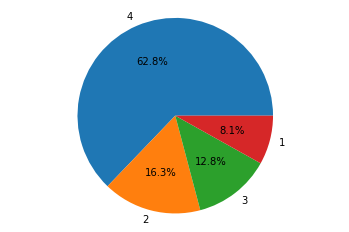

In [37]:
class_counts = train_df['Target'].value_counts()# Create a pie chart of the class distribution 
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%') 
plt.axis('equal') 
plt.show()

### Top 10 features with highest correlation 

In [38]:
target_col = 'Target'

corr_matrix = train_df.corr()[target_col]

top10 = corr_matrix.abs().nlargest(10)

print(top10)

Target          1.000000
meaneduc        0.337545
hogar_nin       0.328190
r4t1            0.321245
cielorazo       0.308430
escolari        0.308104
eviv3           0.295613
epared3         0.292459
overcrowding    0.289967
pisomoscer      0.283028
Name: Target, dtype: float64


### Checking Accuracy of Model with DecisionTreeClassifier, RandomForestClassifier & LogisticRegression

In [39]:
X = train_df.drop('Target', axis=1)
y = train_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression()
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    c=confusion_matrix(y_test, y_pred)
    print(type(model).__name__, "\nAccuracy:","{:.2f}".format(accuracy),"\nConfusion Matrix:\n ",c,"\nF1 Score: ","{:.2f}".format(f1))

DecisionTreeClassifier 
Accuracy: 0.94 
Confusion Matrix:
  [[ 150    4    1   14]
 [   3  281    3   15]
 [   3    8  220   26]
 [   4   24   19 1137]] 
F1 Score:  0.94
RandomForestClassifier 
Accuracy: 0.95 
Confusion Matrix:
  [[ 152    1    0   16]
 [   1  271    1   29]
 [   1    3  214   39]
 [   0    5    2 1177]] 
F1 Score:  0.95
LogisticRegression 
Accuracy: 0.62 
Confusion Matrix:
  [[   0    0    0  169]
 [   0    0    0  302]
 [   0    0    0  257]
 [   0    0    0 1184]] 
F1 Score:  0.62


### Selecting Features based on threshold value 0.18 

In [40]:
df = train_df
df['Target'] = train_df['Target']

corr_matrix = df.corr()

target_variable = 'Target'
corr_threshold = 0.18
corr_with_target = corr_matrix[target_variable].abs()
relevant_features = corr_with_target[corr_with_target > corr_threshold].index.tolist()
print("No features: ", len(relevant_features)-1)
print("Relevant features: ", relevant_features)

No features:  25
Relevant features:  ['hacdor', 'rooms', 'v18q', 'r4h1', 'r4m1', 'r4t1', 'escolari', 'paredblolad', 'pisomoscer', 'pisocemento', 'cielorazo', 'epared1', 'epared3', 'etecho1', 'etecho3', 'eviv1', 'eviv3', 'hogar_nin', '_dependency', '_edjefe', 'meaneduc', 'instlevel8', 'overcrowding', 'computer', 'qmobilephone', 'Target']


In [41]:
new_df = train_df[['hacdor', 'rooms', 'v18q', 'r4h1', 'r4m1', 'r4t1', 'escolari', 'paredblolad', 'pisomoscer', 'pisocemento', 'cielorazo', 'epared1', 'epared3', 'etecho1', 'etecho3', 'eviv1', 'eviv3', 'hogar_nin', '_dependency', '_edjefe', 'meaneduc', 'instlevel8', 'overcrowding', 'computer', 'qmobilephone', 'Target']]
new_df.head()

,hacdor,rooms,v18q,r4h1,r4m1,r4t1,escolari,paredblolad,pisomoscer,pisocemento,...,eviv3,hogar_nin,_dependency,_edjefe,meaneduc,instlevel8,overcrowding,computer,qmobilephone,Target
0,0,3,0,0,0,0,10,1,1,0,...,0,0,0.0,10.0,10.0,0,1.000000,0,1,4
1,0,4,1,0,0,0,12,0,0,0,...,0,0,8.0,12.0,12.0,1,1.000000,0,1,4
2,0,8,0,0,0,0,11,0,1,0,...,1,0,8.0,0.0,11.0,0,0.500000,0,0,4
3,0,5,1,0,1,1,9,1,1,0,...,1,2,1.0,11.0,11.0,0,1.333333,0,3,4
4,0,5,1,0,1,1,11,1,1,0,...,1,2,1.0,11.0,11.0,0,1.333333,0,3,4


### Checking Accuracy using RandomForestClassifier

In [42]:

X = new_df.drop('Target', axis=1)
y = new_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
print('Accuracy:',"{:.2f}".format(accuracy),"F1 Score: ","{:.2f}".format(f1))

Accuracy: 0.95 F1 Score:  0.95


### Top 30 Features with highest variance

In [43]:
print(top_30_feature_names)

['v2a1' 'age' '_edjefe' 'escolari' '_edjefa' 'meaneduc' 'tamviv' 'tamhog'
 'hhsize' 'hogar_total' 'r4t3' '_dependency' 'qmobilephone' 'rooms' 'r4t2'
 'hogar_nin' 'r4m3' 'r4h3' 'hogar_adul' 'r4t1' 'r4h2' 'Target' 'bedrooms'
 'r4m2' 'overcrowding' 'r4m1' 'r4h1' 'hogar_mayor' 'energcocinar2' 'male']


### Checking Which features are missing for different threshold values

In [44]:
thresholds = [0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24]
accuracy_dict = {}
for threshold in thresholds:
    df = train_df
    df['Target'] = train_df['Target']
    corr_matrix = df.corr()
    target_variable = 'Target'
    corr_with_target = corr_matrix[target_variable].abs()
    relevant_features = corr_with_target[corr_with_target > threshold].index.tolist()
    for i in range(15):
        if top_30_feature_names[i] not in relevant_features:
            relevant_features.append(top_30_feature_names[i])
            print("threshold:",threshold,"i:",i,"Feature",top_30_feature_names[i])

threshold: 0.1 i: 4 Feature _edjefa
threshold: 0.1 i: 14 Feature r4t2
threshold: 0.11 i: 4 Feature _edjefa
threshold: 0.11 i: 14 Feature r4t2
threshold: 0.12 i: 1 Feature age
threshold: 0.12 i: 4 Feature _edjefa
threshold: 0.12 i: 14 Feature r4t2
threshold: 0.13 i: 1 Feature age
threshold: 0.13 i: 4 Feature _edjefa
threshold: 0.13 i: 14 Feature r4t2
threshold: 0.14 i: 0 Feature v2a1
threshold: 0.14 i: 1 Feature age
threshold: 0.14 i: 4 Feature _edjefa
threshold: 0.14 i: 14 Feature r4t2
threshold: 0.15 i: 0 Feature v2a1
threshold: 0.15 i: 1 Feature age
threshold: 0.15 i: 4 Feature _edjefa
threshold: 0.15 i: 7 Feature tamhog
threshold: 0.15 i: 8 Feature hhsize
threshold: 0.15 i: 9 Feature hogar_total
threshold: 0.15 i: 10 Feature r4t3
threshold: 0.15 i: 14 Feature r4t2
threshold: 0.16 i: 0 Feature v2a1
threshold: 0.16 i: 1 Feature age
threshold: 0.16 i: 4 Feature _edjefa
threshold: 0.16 i: 6 Feature tamviv
threshold: 0.16 i: 7 Feature tamhog
threshold: 0.16 i: 8 Feature hhsize
threshold:

### Top 5 thresholds with highest Accuracy

In [45]:
thresholds = [0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24]
accuracy_dict = {}
for threshold in thresholds:
    df = train_df
    df['Target'] = train_df['Target']
    corr_matrix = df.corr()
    target_variable = 'Target'
    corr_with_target = corr_matrix[target_variable].abs()
    relevant_features = corr_with_target[corr_with_target > threshold].index.tolist()
    X = train_df[relevant_features]
    X = X.drop('Target', axis=1)
    y = train_df['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[threshold] = accuracy
    f1 = f1_score(y_test, y_pred, average='micro')
    print("Threshold: ",threshold," Accuracy: ","{:.2f}".format(accuracy_dict[threshold]), " F1 Score: ","{:.2f}".format(f1))
sorted_accuracy_dict = sorted(accuracy_dict.items(), key=lambda x: x[1], reverse=True)
print("Top 6 thresholds with the highest accuracy:")
for i in range(6):
    print("Threshold: ", sorted_accuracy_dict[i][0], " Accuracy: ","{:.2f}".format(sorted_accuracy_dict[i][1]))

Threshold:  0.1  Accuracy:  0.95  F1 Score:  0.95
Threshold:  0.11  Accuracy:  0.95  F1 Score:  0.95
Threshold:  0.12  Accuracy:  0.96  F1 Score:  0.96
Threshold:  0.13  Accuracy:  0.96  F1 Score:  0.96
Threshold:  0.14  Accuracy:  0.96  F1 Score:  0.96
Threshold:  0.15  Accuracy:  0.96  F1 Score:  0.96
Threshold:  0.16  Accuracy:  0.96  F1 Score:  0.96
Threshold:  0.17  Accuracy:  0.96  F1 Score:  0.96
Threshold:  0.18  Accuracy:  0.95  F1 Score:  0.95
Threshold:  0.19  Accuracy:  0.95  F1 Score:  0.95
Threshold:  0.2  Accuracy:  0.94  F1 Score:  0.94
Threshold:  0.21  Accuracy:  0.93  F1 Score:  0.93
Threshold:  0.22  Accuracy:  0.93  F1 Score:  0.93
Threshold:  0.23  Accuracy:  0.92  F1 Score:  0.92
Threshold:  0.24  Accuracy:  0.92  F1 Score:  0.92
Top 6 thresholds with the highest accuracy:
Threshold:  0.15  Accuracy:  0.96
Threshold:  0.13  Accuracy:  0.96
Threshold:  0.14  Accuracy:  0.96
Threshold:  0.12  Accuracy:  0.96
Threshold:  0.16  Accuracy:  0.96
Threshold:  0.17  Accur

### Checking Accuracy for each threshold level with adding missing features with highest variance

In [46]:
thresholds = [0.12, 0.13, 0.14, 0.15, 0.16, 0.17]
accuracy_dict = {}

 

# Loop over different correlation thresholds
for threshold in thresholds:
    # Calculate correlation matrix
    corr_matrix = train_df.corr()
    # Find relevant features based on correlation with target variable
    target_variable = 'Target'
    corr_with_target = corr_matrix[target_variable].abs()
    relevant_features = corr_with_target[corr_with_target > threshold].index.tolist()

 

    # Train a random forest model on relevant features
    X = train_df[relevant_features].drop('Target', axis=1)
    y = train_df['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[threshold] = accuracy
    f1 = f1_score(y_test, y_pred, average='micro')
    print("Threshold: ",threshold," Accuracy: ","{:.2f}".format(accuracy_dict[threshold]), " F1 Score: ","{:.2f}".format(f1))

 

    # Add top 30 features not already included and retrain model
    for i in range(15):
        if top_30_feature_names[i] not in relevant_features:
            relevant_features.append(top_30_feature_names[i])
        X = train_df[relevant_features].drop('Target', axis=1)
        y = train_df['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > accuracy_dict[threshold]:
            accuracy_dict[threshold] = accuracy
            f1 = f1_score(y_test, y_pred, average='micro')
            print("Threshold: ",threshold," Accuracy: ","{:.2f}".format(accuracy_dict[threshold]), " F1 Score: ","{:.2f}".format(f1))

 

    print(f"Number of features at threshold {threshold:.2f}: {len(relevant_features)}")

 

# Find threshold with minimum number of features and accuracy > 0.94
print()
print()
print()
print("Number of feature for accuracy 96%:")
print()
print(X.columns.tolist())


Threshold:  0.12  Accuracy:  0.96  F1 Score:  0.96
Number of features at threshold 0.12: 55
Threshold:  0.13  Accuracy:  0.96  F1 Score:  0.96
Number of features at threshold 0.13: 54
Threshold:  0.14  Accuracy:  0.96  F1 Score:  0.96
Threshold:  0.14  Accuracy:  0.96  F1 Score:  0.96
Number of features at threshold 0.14: 51
Threshold:  0.15  Accuracy:  0.96  F1 Score:  0.96
Number of features at threshold 0.15: 48
Threshold:  0.16  Accuracy:  0.96  F1 Score:  0.96
Threshold:  0.16  Accuracy:  0.96  F1 Score:  0.96
Number of features at threshold 0.16: 45
Threshold:  0.17  Accuracy:  0.96  F1 Score:  0.96
Number of features at threshold 0.17: 39



Number of feature for accuracy 96%:

['hacdor', 'rooms', 'v18q', 'r4h1', 'r4m1', 'r4m3', 'r4t1', 'escolari', 'paredblolad', 'pisomoscer', 'pisocemento', 'cielorazo', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'hogar_nin', '_dependency', '_edjefe', 'meaneduc', 'instlevel8', 'overcrowding', 'computer', 'q

### Predicting the accuracy for Random Forest Classifier using  Hyperparameter tuning

In [47]:
thresholds = [0.16, 0.17]
accuracy_dict = {}

# Loop over different correlation thresholds
for threshold in thresholds:
    # Calculate correlation matrix
    corr_matrix = train_df.corr()
    # Find relevant features based on correlation with target variable
    target_variable = 'Target'
    corr_with_target = corr_matrix[target_variable].abs()
    relevant_features = corr_with_target[corr_with_target > threshold].index.tolist()

 

    # Train a random forest model on relevant features
    X = train_df[relevant_features].drop('Target', axis=1)
    y = train_df['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None,5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = RandomForestClassifier(random_state=0)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print("Best hyperparameters:", grid_search.best_params_)
    y_pred = grid_search.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    print('Accuracy:', "{:.2f}".format(accuracy), " F1 Score: ","{:.2f}".format(f1))

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.96  F1 Score:  0.96
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.95  F1 Score:  0.95


### Predicting the accuracy for Random Forest Classifier usin Cross validation using Kfold

In [48]:
X = train_df.drop('Target', axis=1)
y = train_df['Target']

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

model = RandomForestClassifier(random_state=42, n_jobs = -1)
print(cross_val_score(model, X, y, cv=kfold, scoring='accuracy'))

results=cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(results.mean())

[0.94612971 0.94403766 0.93354265 0.94714809 0.95028781]
0.9442291818561992


### Visual representation of confusion matrix

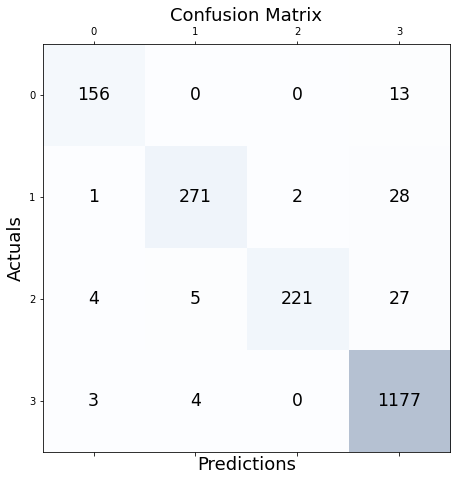

In [49]:
cm= confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Classification Report

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.92      0.94       169
           2       0.97      0.90      0.93       302
           3       0.99      0.86      0.92       257
           4       0.95      0.99      0.97      1184

    accuracy                           0.95      1912
   macro avg       0.96      0.92      0.94      1912
weighted avg       0.96      0.95      0.95      1912

